In [2]:
import pandas as pd

df = pd.read_json('shows.jsonl', lines=True).sort_values('views_all_time', ascending=False)
df['url'] = 'https://archive.org/details/' + df['identifier']
df.views_all_time = df.views_all_time.astype(int)
df

,mediatype,collection,title,description,subject,creator,identifier,uploader,addeddate,publicdate,...,ocr_parameters,ocr_module_version,ocr_autonomous,ocr_detected_script,ocr_detected_script_conf,ocr_detected_lang,ocr_detected_lang_conf,page_number_confidence,page_number_module_version,licenseurl
0,etree,"[DeadAndCompany, etree]",Dead & Company Live at Times Union Center on 2...,AKG568ebs>LunatecV3(35db Gain)>MarantzPMD671>C...,Bob Weir,Dead & Company,10-29-15DeadAndCompanyTimesUnionCenterAlbanyNy,binto37@aol.com,2015-10-30 09:25:00.35442,2015-10-30 09:43:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,etree,"[DeadAndCompany, etree]",Dead & Company Live at Barton Hall on 2023-05-08,<div>Dead &amp; Company</div><div>Barton Hall ...,Live concert,Dead & Company,deadco2023-05-08.EJL95,ejlugassy@gmail.com,2023-05-09 06:07:42,2023-05-09 06:07:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,etree,"[DeadAndCompany, teamdirtysouth, etree, audio_...",Dead & Company Live at PNC Music Pavillion on ...,"Dead and Company\nJune 10th, 2016\nPNC Music P...",Team Dirty South; Dead and Company,Dead & Company,deadandco2016-06-10.flac24,m.b.loving@proton.me,2016-06-11 06:35:32,2016-06-11 06:37:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,etree,"[DeadAndCompany, etree]",Dead & Company Live at Fenway Park on 2016-07-15,Set One:\n\n01 Jam > \n02 Jack Straw >\n03 The...,NaN,Dead & Company,deadco2016-07-15.mg21.flac16,kantaya@gmail.com,2016-07-16 14:45:56,2016-07-16 14:51:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,etree,"[DeadAndCompany, etree]",Dead & Company Live at Citizens Bank Park on 2...,<div>Dead And Company</div><div>Citizens Bank ...,"[Dead & Company, Dead And Company, Bob Weir, J...",Dead & Company,deadco2021-08-21.CitizensBankParkPhiladelphiaPA,jtrembl7@nycap.rr.com,2021-08-22 06:04:42,2021-08-22 06:04:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,etree,"[DeadAndCompany, etree]",Dead & Company Live at Jiffy Lube Live on 2016...,"<p style=""margin:0px;font-size:12px;line-heigh...",Live concert,Dead & Company,deadco2016-06-23.neumannak40,tapernate@gmail.com,2022-11-18 15:28:32,2022-11-18 15:28:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,etree,"[DeadAndCompany, etree]",Dead & Company Live at Darein Lake on 2021-08-25,<div>8-25-21</div><div>Dead And Company</div><...,Live concert,Dead & Company,deadco2021-08-25,binto37@aol.com,2024-02-13 17:00:12,2024-02-13 17:00:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,etree,"[DeadAndCompany, etree]",Dead & Company Live at Sphere on 2025-03-29,"<div><font color=""#2c2c2c"" face=""Helvetica Neu...",Live concert,Dead & Company,deadco2025-03-29.mv88,frostbyte@mchsi.com,2025-05-26 00:52:16,2025-05-26 00:52:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,etree,"[DeadAndCompany, etree]",Dead & Company Live at BB&T Center on 2018-02-26,Source: AKG C568EB &gt; Shure FP24 &gt; Edirol...,AKG C568EB; Live concert spyder9,Dead & Company,deadandco2018-02-26.r09.spyder9.flac16,dnolanjr@yahoo.com,2025-04-15 01:46:48,2025-04-15 01:46:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


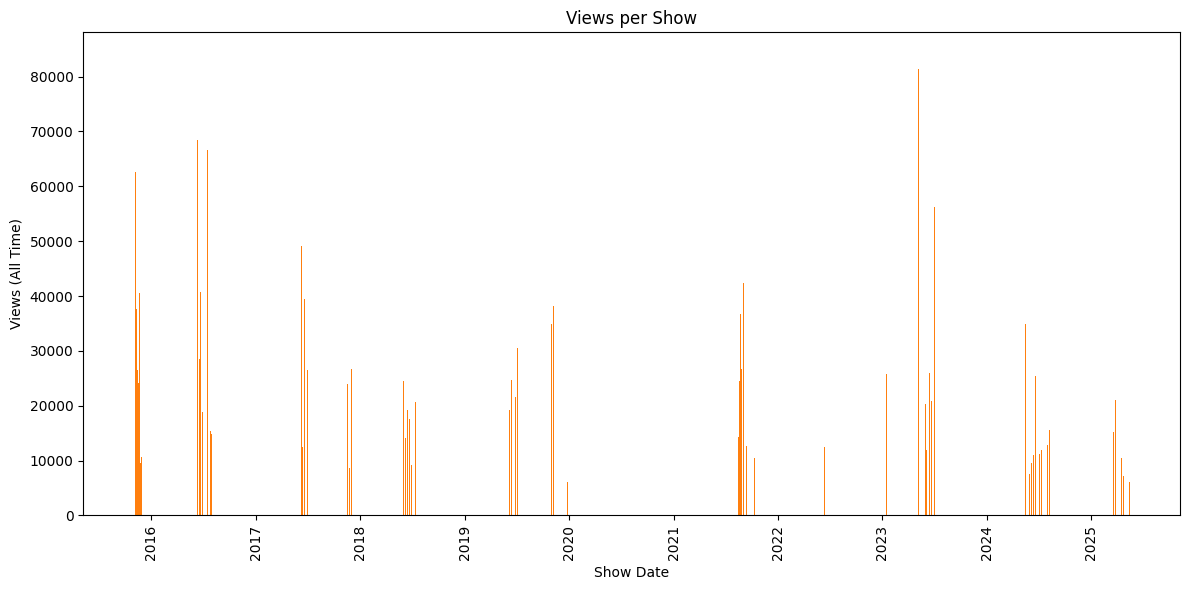

In [5]:
import matplotlib.pyplot as plt

# generate graph
plt.figure(figsize=(12, 6))
plt.bar(df['date'], df['views_all_time'])
plt.xlabel('Show Date')
plt.ylabel('Views (All Time)')
plt.title('Views per Show')
plt.xticks(rotation=90)
plt.tight_layout()

# add venue mouseovers
import mplcursors
bars = plt.bar(df['date'], df['views_all_time'])
mplcursors.cursor(bars).connect(
    "add", lambda sel: sel.annotation.set_text(
        f"Venue: {df['venue'].iloc[sel.index]}\nDate: {df['date'].iloc[sel.index]}"
    )
)

plt.show()

In [45]:
# filter top 25% of shows viewed
quantile_val = df.views_all_time.quantile(0.75)
top_quartile = df[df.views_all_time >= quantile_val]
top_quartile[['venue', 'coverage', 'date', 'views_all_time', 'views_last_30day']]

,venue,coverage,date,views_all_time,views_last_30day
0,Times Union Center,"Albany, NY",2015-10-29,83881,101
616,Barton Hall,"Ithaca, New York",2023-05-08,81392,367
280,PNC Music Pavillion,"Charlotte, NC",2016-06-10,68419,83
436,Fenway Park,"Boston, MA",2016-07-15,66575,98
539,Citizens Bank Park,"Philadelphia, PA",2021-08-21,62725,81
...,...,...,...,...,...
36,Irvine Meadows,"Irvine, CA",2016-07-26,14228,4
186,Cellairis Amphitheater at Lakewood,"Atlanta, GA",2018-06-08,14067,12
777,"Sphere, Las Vegas, NV","Las Vegas, Nevada",2024-08-10,14056,576
775,The Sphere,"Las Vegas, NV",2024-08-09,13992,246


In [46]:
top_quartile.to_json('top_shows.jsonl', orient='records', lines=True)